<a href="https://colab.research.google.com/github/DakshG029/DDA-Project/blob/main/KS_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-2041755972.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  nifty = yf.download("^NSEI", start="2010-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed


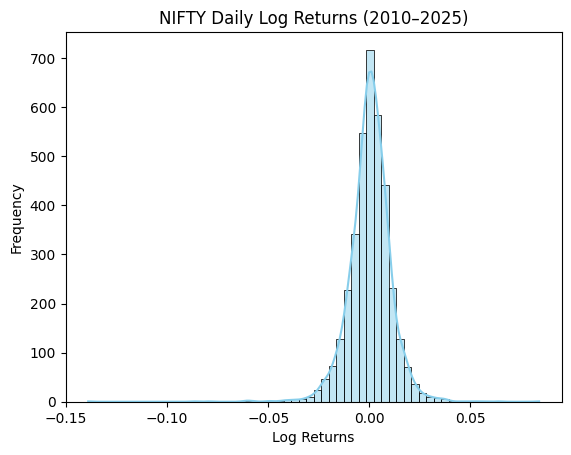

/usr/local/lib/python3.12/dist-packages/scipy/stats/_continuous_distns.py:6921: RuntimeWarning: invalid value encountered in log
  lndata = np.log(data - loc)
/usr/local/lib/python3.12/dist-packages/scipy/stats/_continuous_distns.py:796: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.12/dist-packages/scipy/stats/_continuous_distns.py:801: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.
  a, b = optimize.fsolve(func, (1.0, 1.0))


=== Distribution Fit Results ===
                                                    params KS_statistic  \
t        (4.057995138130453, 0.0006637828188691944, 0.0...     0.012246   
laplace      (0.0006602588660852999, 0.007436243594397277)     0.022851   
beta     (1481.9745957875466, 332.7338082131786, -0.947...     0.057624   
lognorm  (0.001314159652227852, -8.04194597763522, 8.04...     0.060948   
norm          (0.0004099786283230098, 0.01060897812976148)     0.062332   
gamma    (0.39337183762283556, -0.13903756461051206, 1....     0.567631   

          p_value  
t        0.634704  
laplace  0.042235  
beta          0.0  
lognorm       0.0  
norm          0.0  
gamma         0.0  


/usr/local/lib/python3.12/dist-packages/scipy/stats/_continuous_distns.py:6921: RuntimeWarning: invalid value encountered in log
  lndata = np.log(data - loc)
/usr/local/lib/python3.12/dist-packages/scipy/stats/_continuous_distns.py:796: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.12/dist-packages/scipy/stats/_continuous_distns.py:801: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.
  a, b = optimize.fsolve(func, (1.0, 1.0))


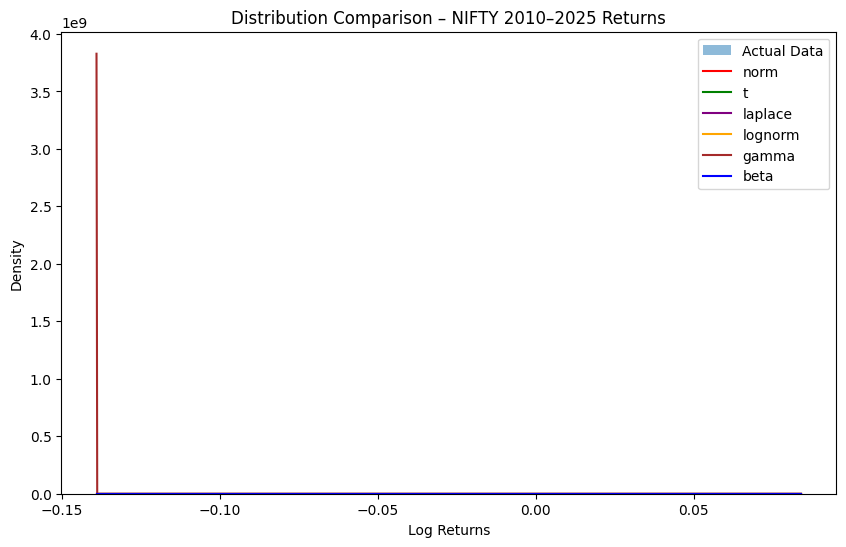

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Step 1: Download NIFTY 50 data (2010-01-01 to 2025-01-01)
nifty = yf.download("^NSEI", start="2010-01-01", end="2025-01-01")

# Keep only closing prices
data = nifty[['Close']].dropna()
data.to_excel("NIFTY_2010_2025_Closing_Prices.xlsx")

# Step 2: Compute daily log returns
data['Return'] = np.log(data['Close'] / data['Close'].shift(1))
data.dropna(inplace=True)

# Step 3: Plot histogram and KDE
sns.histplot(data['Return'], bins=60, kde=True, color='skyblue')
plt.title('NIFTY Daily Log Returns (2010–2025)')
plt.xlabel('Log Returns')
plt.ylabel('Frequency')
plt.show()

# Step 4: Fit multiple distributions
returns = data['Return']
distributions = ['norm', 't', 'laplace', 'lognorm', 'gamma', 'beta']
results = {}

for dist_name in distributions:
    try:
        dist = getattr(stats, dist_name)
        params = dist.fit(returns)
        ks_stat, ks_p = stats.kstest(returns, dist_name, args=params)
        results[dist_name] = {
            'params': params,
            'KS_statistic': ks_stat,
            'p_value': ks_p
        }
    except Exception as e:
        results[dist_name] = {'Error': str(e)}

# Step 5: Convert results to DataFrame
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values(by='KS_statistic')
print("=== Distribution Fit Results ===")
print(results_df)

# Export results to Excel
results_df.to_excel("NIFTY_Distribution_Fit_Results.xlsx")

# Step 6: Plot comparison of fitted PDFs
x = np.linspace(returns.min(), returns.max(), 1000)
plt.figure(figsize=(10,6))
plt.hist(returns, bins=50, density=True, alpha=0.5, label='Actual Data')

colors = ['red', 'green', 'purple', 'orange', 'brown', 'blue']
for color, dist_name in zip(colors, distributions):
    try:
        dist = getattr(stats, dist_name)
        params = dist.fit(returns)
        pdf = dist.pdf(x, *params)
        plt.plot(x, pdf, label=dist_name, color=color)
    except:
        continue

plt.legend()
plt.title('Distribution Comparison – NIFTY 2010–2025 Returns')
plt.xlabel('Log Returns')
plt.ylabel('Density')
plt.show()